In [1]:
# 통계분석 라이브러리
# 선형회귀, 시계열 분석, 분산 분석, 로지스틱 회귀 같은 알고리즘을 통해
# 모델을 구현하는데 사용됨
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from matplotlib import font_manager, rc

# 한글 폰트
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False


In [3]:
df_origin_data = pd.read_csv('temperature.csv')

In [4]:
df_origin_data.head()

df_origin_data.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
std,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


In [5]:
df_origin_data.info()

df_origin_data['일시'] = pd.to_datetime(df_origin_data['일시'])

df_origin_data.set_index('일시', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [6]:
df_origin_data.head()

# 데이터의 시간 간격을 지정한다.
# 현재 우리가 가진 데이터는 하루도 빠짐없이 모든 데이터를 가지고 있으므로 'D'를 설정한다.
# 만약 달의 마지막날 기준으로 데이터가 저장되어 있다면 'M'
# 달의 시작일로 저장되어 있다면 'MS'
# 연의 마지막 날 기준이면 'Y'
# 연의 시작일 기준이면 'YS'를 사용한다.
df_origin_data.index.freq = 'D'

In [7]:
df_data = df_origin_data

df_data.isna().sum()

최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [8]:
# 결측치 상세보기

# 최고 기온
# s_isna = df_data['최고기온'].isna()
# print(df_data[s_isna])

# 최저 기온
# s_isna = df_data['최저기온'].isna()
# print(df_data[s_isna])

df_data.columns

for col in df_data.columns :
  print(df_data[col].isna().value_counts())
  print()
  s_isna = df_data[col].isna()
  print(df_data[s_isna])
  print('------------------------------')

최고기온
False    23008
True         3
Name: count, dtype: int64

            최고기온  최저기온  일교차  강수량  평균습도  평균풍속  일조합   일사합   일조율  평균기온
일시                                                                 
1967-02-19   NaN   NaN  NaN  NaN  62.0   1.8  9.5   NaN  93.1  -1.7
1973-10-16   NaN   NaN  NaN  0.4  74.0   1.8  3.5  9.24  29.7  12.3
2017-10-12   NaN   8.8  NaN  NaN  71.0   2.0  NaN  2.23   0.0  11.4
------------------------------
최저기온
False    23008
True         3
Name: count, dtype: int64

            최고기온  최저기온  일교차    강수량  평균습도  평균풍속  일조합   일사합   일조율  평균기온
일시                                                                   
1967-02-19   NaN   NaN  NaN    NaN  62.0   1.8  9.5   NaN  93.1  -1.7
1973-10-16   NaN   NaN  NaN    0.4  74.0   1.8  3.5  9.24  29.7  12.3
2022-08-08  28.4   NaN  NaN  129.6  91.6   3.3  NaN   NaN   0.0  26.8
------------------------------
일교차
False    23007
True         4
Name: count, dtype: int64

            최고기온  최저기온  일교차    강수량  평균습도  평균풍속  일조합   일사합   일조율

In [9]:
# 결측치 처리

# 최고기온
# 해당연도 2월/10월의 각 평균값을 사용

df_data.loc['1967-02-19', '최고기온']= df_data.loc['1967-02-01':'1967-02-28', '최고기온'].mean()
df_data.loc['1973-10-16', '최고기온']= df_data.loc['1973-10-01':'1973-10-31', '최고기온'].mean()
df_data.loc['2017-10-12', '최고기온']= df_data.loc['2017-10-01':'2017-10-31', '최고기온'].mean()

print(df_data['최고기온'].isna().sum())

0


In [10]:
df_data.loc['1967-02-19', '최저기온']= df_data.loc['1967-02-01':'1967-02-28', '최저기온'].mean()
df_data.loc['1973-10-16', '최저기온']= df_data.loc['1973-10-01':'1973-10-31', '최저기온'].mean()
df_data.loc['2022-08-08', '최저기온']= df_data.loc['2022-08-01':'2022-08-31', '최저기온'].mean()

print(df_data['최저기온'].isna().sum())

0


In [11]:
# 일교차 = 최고기온 - 최저기온
# 다중공선성 : 하나의 독립변수가 다른 여러 개의 독립변수들로 예측이 되는 경우
df_data.drop('일교차', axis=1, inplace=True)
df_data.isna().sum()

최고기온        0
최저기온        0
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [12]:
# 일사합 : 태양 광선의 에너지가 땅에 닿는 양의 합계
# 일조합 : 일사시간의 합계
# 일조율 : 해가 떠있는 시간 대비 태양 광선이 땅에 닿은 시간 비율

# 보간법이란?
# 전체 데이터중 특정 지점의 데이터를 이용하여 새로운 데이터를 추측하는 방법 -> 근사값 찾기

# 선형 보간법
# 양끝점이 주어졌을 때 그 사이에 위치한 값을 추정하는 방법
# 결측치가 주변데이터에 대해 선형적인 경우가 많다고 가정하고 채운다.

cols = ['일조합', '일사합', '일조율']

# interpolate() 보간법을 사용한다.
# method옵션에 linear를 사용하면 선형보간법을 사용
for col in cols :
  df_data[col].interpolate(method='linear', inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4264\158108921.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data[col].interpolate(method='linear', inplace=True)


In [13]:
df_data.isna().sum()

최고기온        0
최저기온        0
강수량     13861
평균습도        0
평균풍속        4
일조합         0
일사합      4749
일조율       366
평균기온        0
dtype: int64

In [14]:
for col in df_data.columns :
  print(df_data[col].isna().value_counts())
  print()
  s_isna = df_data[col].isna()
  print(df_data[s_isna])
  print('------------------------------')

최고기온
False    23011
Name: count, dtype: int64

Empty DataFrame
Columns: [최고기온, 최저기온, 강수량, 평균습도, 평균풍속, 일조합, 일사합, 일조율, 평균기온]
Index: []
------------------------------
최저기온
False    23011
Name: count, dtype: int64

Empty DataFrame
Columns: [최고기온, 최저기온, 강수량, 평균습도, 평균풍속, 일조합, 일사합, 일조율, 평균기온]
Index: []
------------------------------
강수량
True     13861
False     9150
Name: count, dtype: int64

            최고기온  최저기온  강수량  평균습도  평균풍속  일조합    일사합   일조율  평균기온
일시                                                             
1960-01-01   2.2  -5.2  NaN  68.3   1.7  6.7    NaN   NaN  -1.6
1960-01-05   1.3  -8.2  NaN  44.0   5.1  8.2    NaN   NaN  -4.6
1960-01-11   2.6  -5.4  NaN  50.3   4.1  8.2    NaN   NaN  -2.3
1960-01-13   1.6  -9.1  NaN  39.0   1.4  6.7    NaN   NaN  -2.8
1960-01-17  -1.1  -9.9  NaN  40.3   2.3  7.0    NaN   NaN  -5.3
...          ...   ...  ...   ...   ...  ...    ...   ...   ...
2022-12-23  -8.6 -13.7  NaN  60.5   4.3  8.4  10.76  87.5 -11.8
2022-12-24  -2.0 -13.5  NaN  54.9  

In [15]:
# 일사합 및 일조율이 시작 데이터부터 1972년까지 결측치라서 보간법이 적용되지 않음
# -> drop

df_data = df_data.loc['1973-01-01':, :]
df_data.head()

,최고기온,최저기온,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
일시,,,,,,,,,
1973-01-01,7.0,-1.2,2.9,75.0,3.0,2.4,4.81,25.0,3.2
1973-01-02,-1.1,-11.0,NaN,51.0,4.9,8.0,7.70,83.3,-6.8
1973-01-03,-2.8,-11.3,0.0,66.3,1.4,2.8,6.16,28.9,-7.5
1973-01-04,3.0,-6.9,NaN,75.3,1.0,4.9,7.25,50.5,-2.7
1973-01-05,5.6,-3.7,NaN,78.3,1.6,4.8,6.92,49.5,0.1


In [16]:
df_data.isna().sum()

최고기온        0
최저기온        0
강수량     11134
평균습도        0
평균풍속        4
일조합         0
일사합         0
일조율         0
평균기온        0
dtype: int64

In [17]:
# 계절 컬럼 추가하기
df_data.index

# datetime 타입은 월만 뽑아낼 수 있다.
df_data.index.month

for idx in df_data.index :
  if idx.month in [3, 4, 5] :
    df_data.loc[idx, '계절'] = '봄'
  elif idx.month in [6, 7, 8] :
    df_data.loc[idx, '계절'] = '여름'
  elif idx.month in [9, 10, 11] :
    df_data.loc[idx, '계절'] = '가을'
  else:
    df_data.loc[idx, '계절'] = '겨울'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4264\3489855535.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.loc[idx, '계절'] = '겨울'


In [18]:
df_data.head()

df_data['계절'].value_counts()

계절
봄     4600
여름    4600
가을    4550
겨울    4512
Name: count, dtype: int64

array([<Axes: xlabel='일시'>, <Axes: xlabel='일시'>, <Axes: xlabel='일시'>,
       <Axes: xlabel='일시'>], dtype=object)

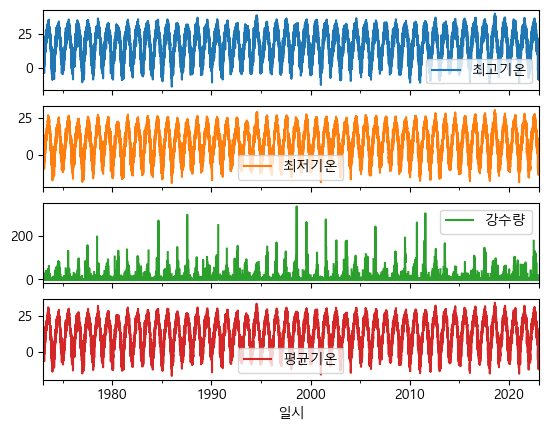

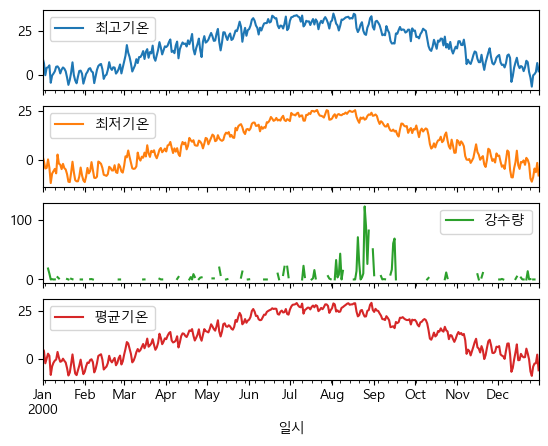

In [19]:
# 컬럼별 상관관계 및 통계량 분석(시각화)

# 일자별 최고/최저기온, 평균기온, 강수량 추이
plot_cols = ['최고기온', '최저기온', '강수량', '평균기온']
plot_features = df_data[plot_cols]

# 각각의 칼럼들을 별도의 서브플롯에 그리기
# subplots=True 옵션을 넣으면 각 칼럼별로 시각화를 진행한다.
plot_features.plot(subplots=True)

# 2000년 월별 추이
plot_2000 = plot_features.loc['2000-01-01':'2000-12-31']
plot_2000.plot(subplots=True)


In [20]:
# 평균기온별 강수량

rain_tp1 = df_data.groupby('평균기온')['강수량'].mean()

rain_tp2 = df_data.groupby('평균기온')['강수량'].max()

rain_tp3 = df_data.groupby('평균기온')['강수량'].min()


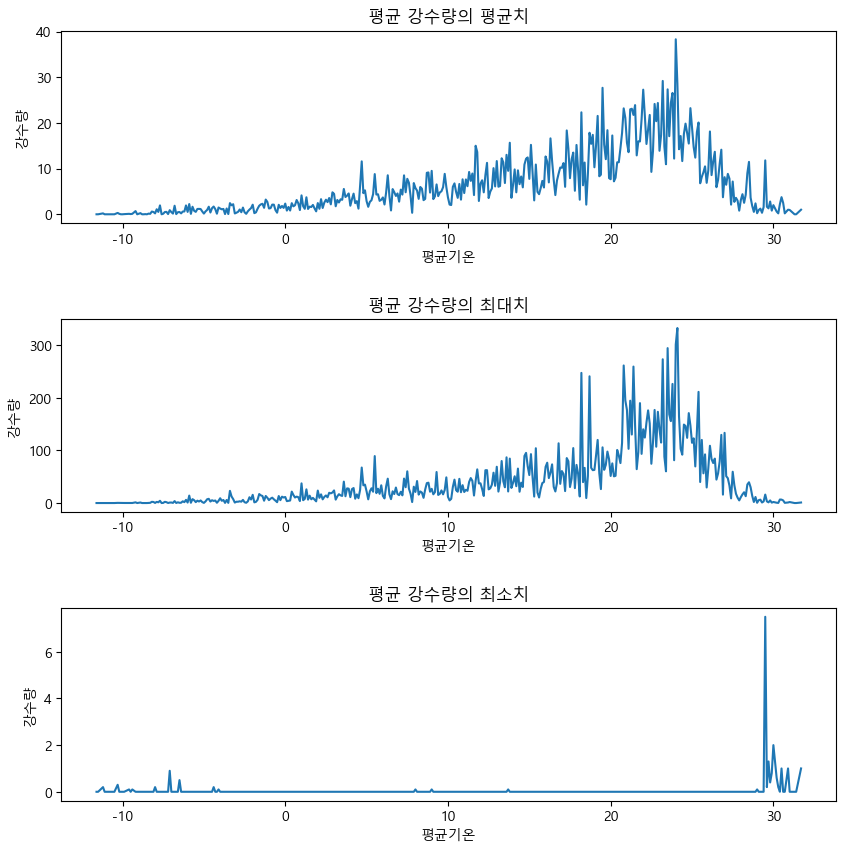

In [21]:
# 시각화
fig, ax = plt.subplots(3,1, figsize=(10, 10))

sns.lineplot(data=rain_tp1, ax=ax[0])
ax[0].set_title('평균 강수량의 평균치')

sns.lineplot(data=rain_tp2, ax=ax[1])
ax[1].set_title('평균 강수량의 최대치')

sns.lineplot(data=rain_tp3, ax=ax[2])
ax[2].set_title('평균 강수량의 최소치')

plt.subplots_adjust(hspace=0.5)

plt.show()

# 기온이 낮을 수록 강수량이 적다.
# 기온이 20~30에 가장 강수량이 높고 비약적으로 높은 구간은 장마로 예상된다.
# 기온이 20 후반으로 갈 수록 강수량이 적어진다. -> 장마 후 무더위가 예상된다.

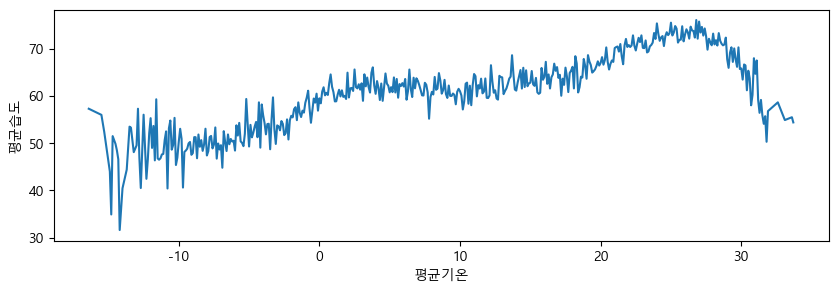

In [22]:
# 평균기온별 습도 평균치
hum_tp = df_data.groupby('평균기온')['평균습도'].mean()

fig = plt.figure(figsize=(10, 3))
sns.lineplot(data=hum_tp)

plt.show()

# 습도는 기온이 20 초~후반이 가장 높다.

In [23]:
# 평균기온별 평균풍속

wind_tp1 = df_data.groupby('평균기온')['평균풍속'].mean()
wind_tp1

wind_tp2 = df_data.groupby('평균기온')['평균풍속'].max()
wind_tp2

wind_tp3 = df_data.groupby('평균기온')['평균풍속'].min()
wind_tp3

평균기온
-16.4    3.8
-15.5    2.3
-15.3    3.2
-14.9    3.3
-14.8    2.6
        ... 
 31.9    1.7
 32.6    1.4
 33.1    1.4
 33.6    1.7
 33.7    1.6
Name: 평균풍속, Length: 468, dtype: float64

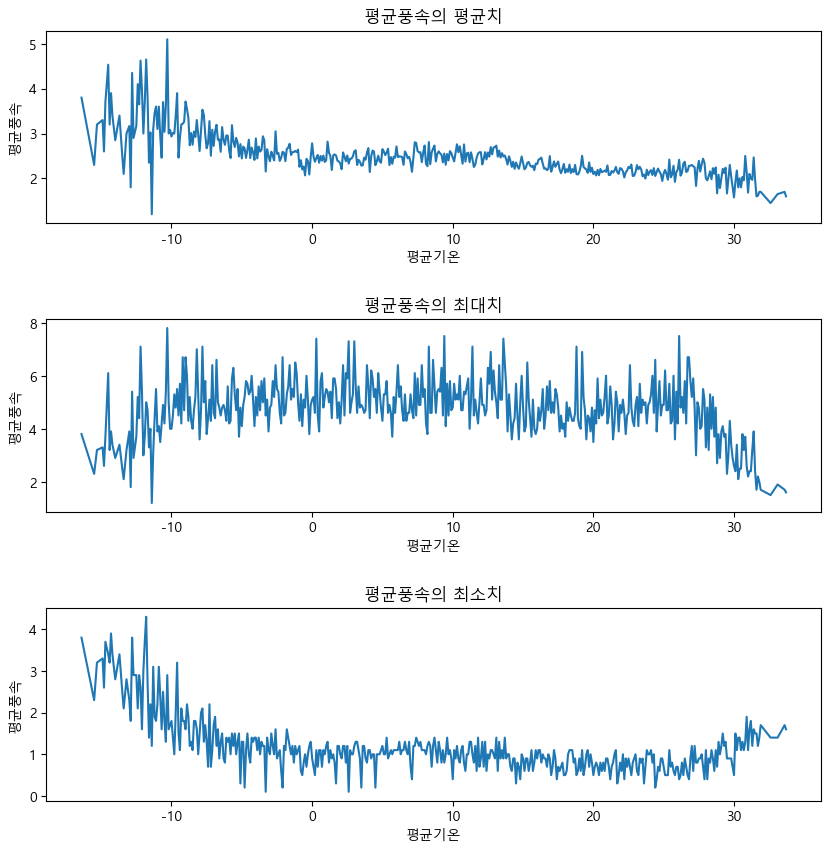

In [24]:
# 시각화
fig, ax = plt.subplots(3, 1, figsize=(10,10))

sns.lineplot(data=wind_tp1, ax = ax[0])
ax[0].set_title('평균풍속의 평균치')

sns.lineplot(data=wind_tp2, ax = ax[1])
ax[1].set_title('평균풍속의 최대치')

sns.lineplot(data=wind_tp3, ax = ax[2])
ax[2].set_title('평균풍속의 최소치')

plt.subplots_adjust(hspace=0.5)

plt.show()

# 풍속의 경우 변화가 굉장히 심한 구간이 있다.
# 평균풍속의 평균치는 낮은 기온에서 높은 값이 분포해 있고
# 최대치는 30도쯤을 제외하면 거의 고르게 분포
# 최소치는 기온이 낮을때를 제외하면 고루 분포
# 특수상황(태풍) 존재 가능성을 염두했는데 눈에 띄는 데이터가 없다.

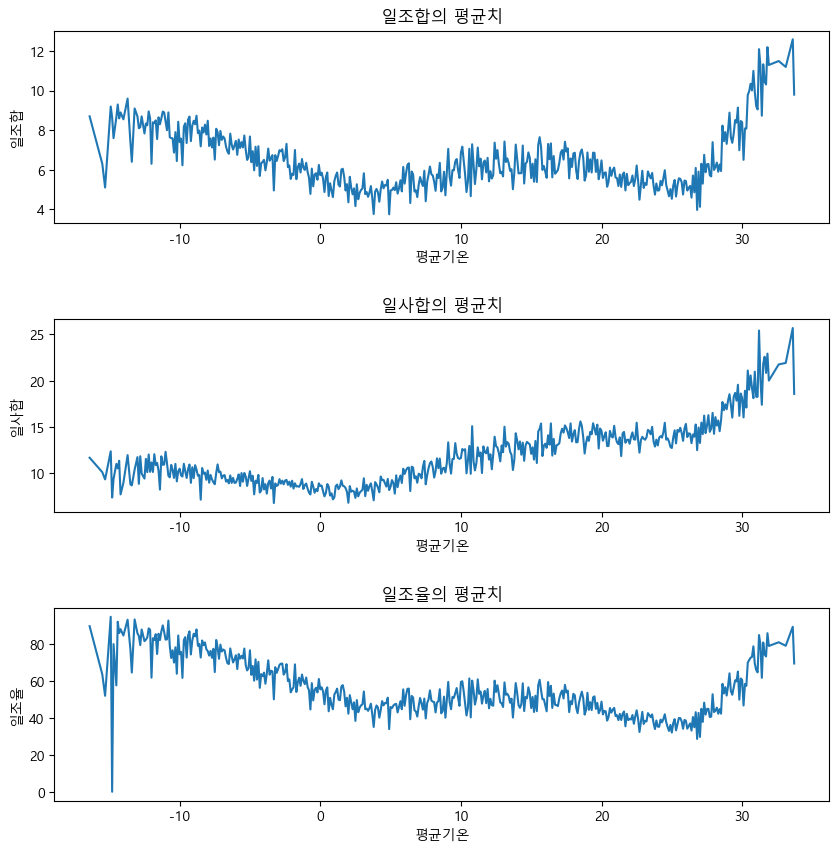

In [25]:
sunshine_tp = df_data.groupby('평균기온')['일조합'].mean()

solar_radiation_tp = df_data.groupby('평균기온')['일사합'].mean()

rate_of_sunshine_tp = df_data.groupby('평균기온')['일조율'].mean()

fig, ax = plt.subplots(3,1,figsize=(10,10))

sns.lineplot(data=sunshine_tp, ax=ax[0])
ax[0].set_title('일조합의 평균치')

sns.lineplot(data=solar_radiation_tp, ax=ax[1])
ax[1].set_title('일사합의 평균치')

sns.lineplot(data=rate_of_sunshine_tp, ax=ax[2])
ax[2].set_title('일조율의 평균치')

plt.subplots_adjust(hspace=0.5)
plt.show()

# 일조합
# 20 후반부터 30 이후로 일조합이 최대로 증가 
# 기온이 최저에서 4~5도로 갈수록 일조합이 낮아짐 

# 일사합
# 기온과 거의 비례함

# 일조율
# 평균은 높으나 일조합의 추이와 비슷함

In [26]:
# 평균기온별 최고/최저기온의 평균치
max_tp = df_data.groupby('평균기온')['최고기온'].mean()
max_tp

min_tp = df_data.groupby('평균기온')['최저기온'].mean()
min_tp

평균기온
-16.4   -19.20
-15.5   -18.60
-15.3   -17.70
-14.9   -18.60
-14.8   -17.80
         ...  
 31.9    27.30
 32.6    27.90
 33.1    29.05
 33.6    27.80
 33.7    30.30
Name: 최저기온, Length: 468, dtype: float64

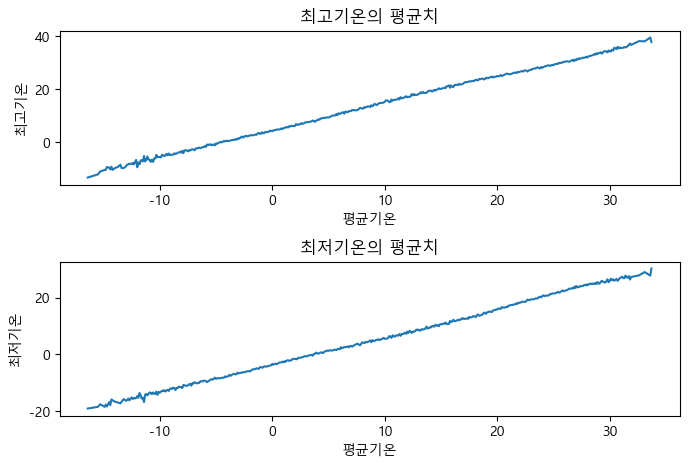

In [27]:
fig, ax  = plt.subplots(2, 1, figsize=(8,5))

sns.lineplot(data=max_tp, ax=ax[0])
ax[0].set_title('최고기온의 평균치')

sns.lineplot(data=min_tp, ax=ax[1])
ax[1].set_title('최저기온의 평균치')

plt.subplots_adjust(hspace=0.5)
plt.show()

Text(0, 0.5, '일교차')

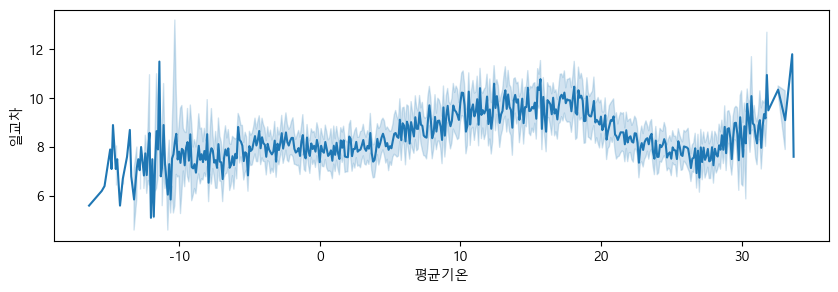

In [28]:
s_temp = df_data['최고기온'] - df_data['최저기온']

s_temp

# 평균기온과 일교차를 확인하기 위해 인덱스를 수정
s_temp.index = df_data['평균기온']
s_temp

plt.figure(figsize=(10, 3))

sns.lineplot(data=s_temp)

plt.ylabel('일교차')

# 영하 10도 이하에서 일교차 편차가 많고
# 10~20도 사이 구간에서 일교차 수치가 높게 나온다.

In [29]:
# 계절 컬럼 활용

# 계절별 최고/최저/평균기온의 평균치 확인

s_max_tp = df_data.groupby('계절')['최고기온'].mean().sort_values()

s_min_tp = df_data.groupby('계절')['최저기온'].mean().sort_values()

s_mean_tp = df_data.groupby('계절')['평균기온'].mean().sort_values()


type(s_mean_tp)

pandas.core.series.Series

   계절       최고기온       최저기온       평균기온
0  겨울   3.411126  -4.450510  -0.782846
1   봄  17.301348   7.485152  12.024652
2  가을  19.269906  10.310048  14.460769
3  여름  28.691435  21.063469  24.466630


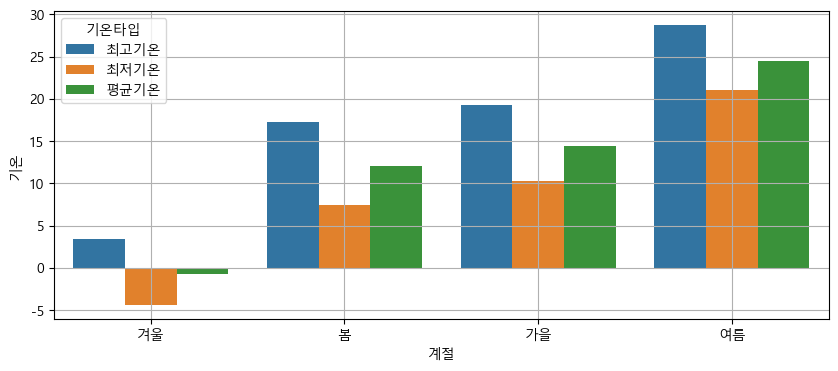

In [30]:
df_tp = pd.concat([s_max_tp, s_min_tp, s_mean_tp], axis=1)

df_tp.reset_index(inplace=True)

print(df_tp)

# melt() 를 통해 데이터 재조정
# 특정 칼럼의 데이터를 하나의 칼럼으로 합쳐준다.
# id_vars : 현재 상태를 유지하고 싶은 컬럼
# value_vars : melt를 수행하고 싶은 칼럼을 지정하며, 생략하면 id_vars를 제외한 모든 칼럼이 value_vars로 지정됨
# value_name : 하나로 합쳐진 칼럼의 이름을 지정
# var_name : melt로 인해 새롭게 만들어진 열의 이름
df_melted = df_tp.melt(id_vars='계절', value_name='기온', var_name='기온타입')

df_melted

fig, ax = plt.subplots(1,1, figsize=(10, 4))

sns.barplot(data=df_melted, x='계절', y='기온', hue='기온타입' , ax=ax)

plt.grid(True)

plt.show()

In [31]:
# 계절별 강수량/평균습도 평균치
s_rain = df_data.groupby('계절')['강수량'].mean().sort_values()
s_rain

s_hum = df_data.groupby('계절')['평균습도'].mean().sort_values()
s_hum

계절
봄     58.595500
겨울    58.991135
가을    64.797253
여름    73.682326
Name: 평균습도, dtype: float64

In [32]:
df_rain = pd.DataFrame(s_rain)
df_rain

df_hum = pd.DataFrame(s_hum)
df_hum

,평균습도
계절,
봄,58.595500
겨울,58.991135
가을,64.797253
여름,73.682326


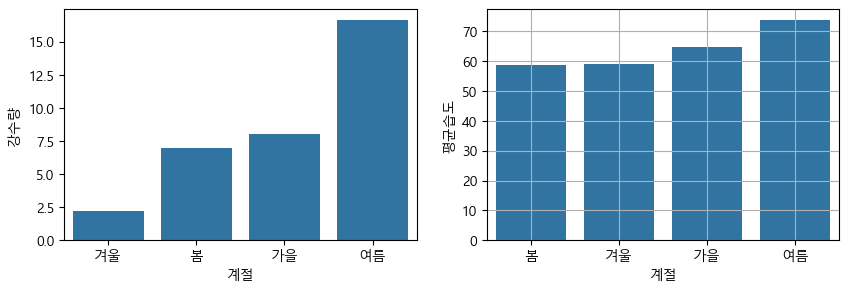

In [33]:
# 시각화
fig, ax = plt.subplots(1,2, figsize=(10,3))

sns.barplot(data=df_rain, y='강수량', x=df_rain.index , ax=ax[0])
sns.barplot(data=df_hum, y='평균습도' , x=df_hum.index, ax=ax[1])

plt.grid(True)
plt.show()

# 강수량 / 평균습도는 여름이 가장 높음
# 습도를 확인해보면 봄과 겨율이 큰 차이는 없으나 봄이 평균치로 봤을 때 가장 건조하다.
# 강수량과 습도가 비례하지 않은것으로 판단(평균습도는 강수량 말고도 다른 요소들의 영향을 크게 받는것으로 판단됨)

<Axes: xlabel='계절', ylabel='평균습도'>

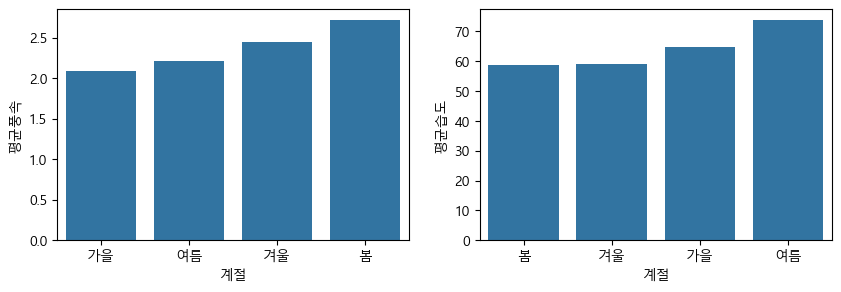

In [34]:
# 풍속과 평균 습도
s_wind = df_data.groupby('계절')['평균풍속'].mean().sort_values()
s_wind

s_hum

df_wind = pd.DataFrame(s_wind)

# 시각화
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.barplot(data=df_wind, x=df_wind.index, y=df_wind['평균풍속'] , ax=ax[0])
sns.barplot(data=df_hum, x=df_hum.index, y=df_hum['평균습도'] , ax=ax[1])

# 평균 풍속이 높은 겨울/봄이 평균 습도 하위에 속함
# 풍속이 평균 습도에 영향을 미칠 수도 있다는 것을 염두

In [35]:
# 계절별 일조합, 일사합, 일조율의 평균치를 구하기

# 시각화